In [108]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import math
from collections import Counter

dice = np.random.randint(1, 7, size=5)
print(dice)
print(dice[dice.argmin()])

[5 5 2 6 1]
1


In [422]:
def keep_threes(ndice):
    ## Take a turn with ndice and return the dice to keep
    dice = np.random.randint(1, 7, size=ndice)
    #print("roll {}".format(dice))
    threes = np.where(dice == 3)[0]
    if len(threes) > 0:
        return [3] * len(threes)
    else:
        return [dice[dice.argmin()]]

In [423]:
def keep_ones(ndice):
    ## Take a turn with ndice and return the dice to keep
    dice = np.random.randint(1, 7, size=ndice)
    #print("roll {}".format(dice))
    threes = np.where(dice == 3)[0]
    ones = np.where(dice == 1)[0]
    if len(threes) > 0 or len(ones) > 0:
        ret = [3] * len(threes)
        ret.extend([1] * len(ones))
        return ret
    else:
        return [dice[dice.argmin()]]

In [475]:
def keep_twos(ndice):
    ## Take a turn with ndice and return the dice to keep
    dice = np.random.randint(1, 7, size=ndice)
    #print("roll {}".format(dice))
    threes = np.where(dice == 3)[0]
    ones = np.where(dice == 1)[0]
    twos = np.where(dice == 2)[0]
    if len(threes) > 0 or len(ones) > 0 or len(twos) > 0:
        ret = [3] * len(threes)
        ret.extend([1] * len(ones))
        ret.extend([2] * len(twos))
        return ret
    else:
        return [dice[dice.argmin()]]
keep_twos(5)

[3, 3, 1, 1]

In [336]:
def threes_tot(dice):
    ## Remove all threes so essentially they are worth 0 points
    return sum(filter(lambda a: a != 3, dice))
roll = np.random.randint(1, 7, size=5)
print(roll, threes_tot(roll))

(array([2, 4, 3, 4, 5]), 15)


In [435]:
def turn(func, ndice=5):
    keepers = []
    while ndice != 0:
        ret = func(ndice)
        ndice -= len(ret)
        keepers.extend(ret)
        #print("keepers {}".format(keepers))
    #print("tot {}".format(threes_tot(keepers)))
    return threes_tot(keepers)
        

In [487]:
res_threes = []
res_ones = []
res_twos = []
for x in range(100):
    res_threes.append(turn(keep_threes))
    res_ones.append(turn(keep_ones))
    res_twos.append(turn(keep_twos))
print("Mean/var threes - {}/{}".format(np.mean(res_threes), np.var(res_threes)))
print("Mean/var ones - {}/{}".format(np.mean(res_ones), np.var(res_ones)))
print("Mean/var twos - {}/{}".format(np.mean(res_twos), np.var(res_twos)))

Mean/var threes - 6.27/14.4971
Mean/var ones - 6.42/9.5236
Mean/var twos - 8.01/8.1699


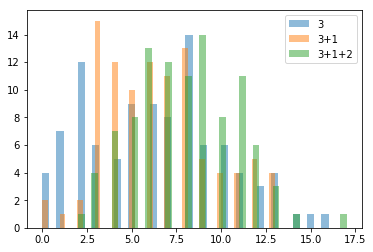

In [488]:
alpha = 0.5
nbins = 40
_, _, _ = plt.hist(res_threes, bins=nbins, alpha=alpha, label="3")
_, _, _ = plt.hist(res_ones, bins=nbins, alpha=alpha, label="3+1")
_, _, _ = plt.hist(res_twos, bins=nbins, alpha=alpha, label="3+1+2")
plt.legend()

In [836]:
## Now we run tournaments
ndice = 5
score_to_switch_strategies = 10000000

def player(best_score, ndice=5, switchval=3):
    ## dynamically adjust strategy, sort of
    ## If the current score is better than the score for switching then
    ## you need to get more aggressive
    if best_score < score_to_switch_strategies:
        func = keep_threes
    else:
        func = keep_ones
    keepers = []
    while ndice != 0:
        ## If we already beat the best score we can hedge a bit
        if threes_tot(keepers) < best_score and ndice <= switchval:
            func = keep_ones
        ret = func(ndice)
        ndice -= len(ret)
        keepers.extend(ret)
        #print(keepers)
    return threes_tot(keepers)

def player_twos(best_score, ndice=5, switchval=3):
    ## dynamically adjust strategy, sort of
    ## If the current score is better than the score for switching then
    ## you need to get more aggressive
    if best_score < score_to_switch_strategies:
        func = keep_threes
    else:
        func = keep_twos
        
    keepers = []
    while ndice != 0:
        ## If we already beat the best score we can hedge a bit
        if threes_tot(keepers) < best_score and ndice <= switchval:
            func = keep_ones
        ret = func(ndice)
        ndice -= len(ret)
        keepers.extend(ret)
        #print(keepers)
    return threes_tot(keepers)



def player_keep_threes(best_score, ndice=5, switchval=0):
    ## dynamically adjust strategy, sort of
    ## If the current score is better than the score for switching then
    ## you need to get more aggressive
    func = keep_threes
    keepers = []
    while ndice != 0:
        ## If we already beat the best score we can hedge a bit
        ret = func(ndice)
        ndice -= len(ret)
        keepers.extend(ret)
        #print(keepers)
    return threes_tot(keepers)

def player_keep_ones(best_score, ndice=5, switchval=0):
    ## dynamically adjust strategy, sort of
    ## If the current score is better than the score for switching then
    ## you need to get more aggressive
    func = keep_ones
    keepers = []
    while ndice != 0:
        ## If we already beat the best score we can hedge a bit
        ret = func(ndice)
        ndice -= len(ret)
        keepers.extend(ret)
        #print(keepers)
    return threes_tot(keepers)

def one_tournament(nplayers = 9):
    ## "best" score at time zero is 30 for 5 dice
    best_score = ndice * 6
    winner = []
    for p in range(nplayers):
        score = player(best_score, ndice)
        #print(p, score)
        if score < best_score:
            ## If the score is truly new then blank the winner list
            winner = []
        if score <= best_score:
            ## Allow for ties
            best_score = score
            #winner = p
            winner.append(p)
    #print(winner, best_score),
    return winner, best_score

for x in xrange(1):
    print(one_tournament(nplayers=100)),

([10, 85, 94, 96], 0)


## 9 players

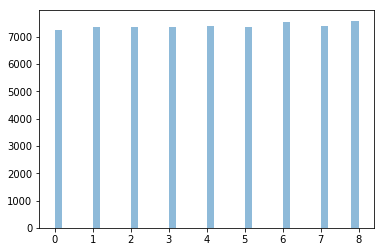

In [829]:
winners = []
scores = []
for _ in range(50000):
    w, b = one_tournament()
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")


(1.79814, 2.0)


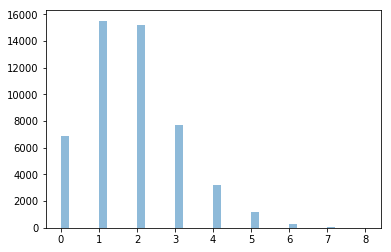

In [830]:
_, _, _ = plt.hist(scores, bins=nbins, alpha=alpha, label="scores")
print(np.mean(scores), np.median(scores))

## 5 players

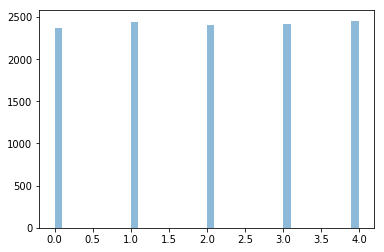

In [751]:
winners = []
scores = []
for _ in range(10000):
    w, b = one_tournament(nplayers=5)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")


(2.6289, 2.0)


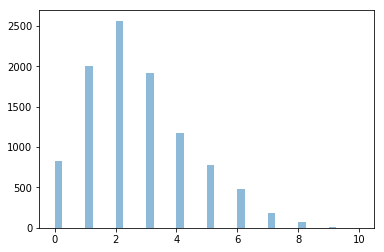

In [752]:
_, _, _ = plt.hist(scores, bins=nbins, alpha=alpha, label="scores")
print(np.mean(scores), np.median(scores))

## Lots of players!!

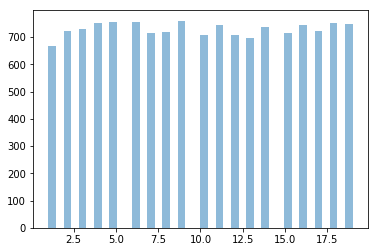

In [705]:
winners = []
scores = []
for _ in range(10000):
    w, b = one_tournament(nplayers=20)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")


(1.6879, 2.0)


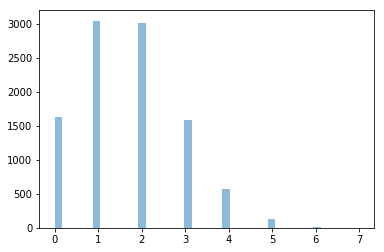

In [706]:
_, _, _ = plt.hist(scores, bins=nbins, alpha=alpha, label="scores")
print(np.mean(scores), np.median(scores))

In [864]:
def one_tournament_diff_strategies(nplayers = 9):
    ## "best" score at time zero is 30 for 5 dice
    best_score = ndice * 6
    winner = []
    players = []
    players.extend([player_keep_threes] * (nplayers / 2))
    players.extend([player_keep_ones] * (nplayers / 2))
    players.extend([player] * (nplayers / 2))
    players.extend([player_twos] * (nplayers / 2))
    

    for i, p in enumerate(players):
        score = p(best_score, ndice, (i%4)+1)
        #print(p, score)
        if score < best_score:
            ## If the score is truly new then blank the winner list
            winner = []
        if score <= best_score:
            ## Allow for ties
            best_score = score
            #winner = p
            winner.append(i)
    #print(winner, best_score),
    return winner, best_score
one_tournament_diff_strategies()

([8], 2)

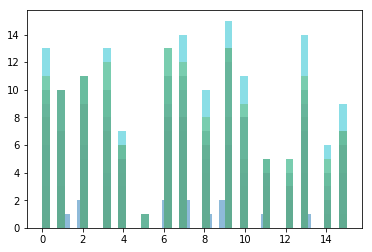

In [886]:
winners = []
scores = []
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")
for _ in range(10):
    w, b = one_tournament_diff_strategies(nplayers=8)
    winners.extend(w)
    scores.append(b)
_, _, _ = plt.hist(winners, bins=nbins, alpha=alpha, label="winners")


(1.9843, 2.0)


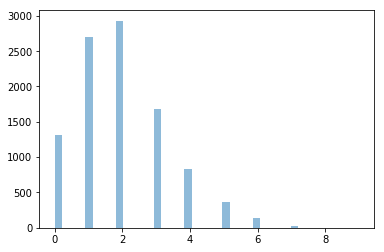

In [847]:
_, _, _ = plt.hist(scores, bins=nbins, alpha=alpha, label="scores")
print(np.mean(scores), np.median(scores))